In [ ]:
# import dependencies
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [ ]:
# load data as dataFrame
df = pd.read_csv('HousingData.csv')
# df.fillna(0, inplace=True)
df = df.dropna()
df.shape

(394, 14)

In [ ]:
# get x and y from data
# ****************************** y is *******************************
#  nox, in which the nitrous oxide level is to be predicted;
#  price, in which the median value of a home is to be predicted
# *******************************************************************
y_price = df.iloc[:,13]
y_price

0      24.0
1      21.6
2      34.7
3      33.4
5      28.7
       ... 
499    17.5
500    16.8
502    20.6
503    23.9
504    22.0
Name: MEDV, Length: 394, dtype: float64

In [ ]:
y_nox = df.iloc[:,4]
y_nox

0      0.538
1      0.469
2      0.469
3      0.458
5      0.458
       ...  
499    0.585
500    0.585
502    0.573
503    0.573
504    0.573
Name: NOX, Length: 394, dtype: float64

In [ ]:
# ****************************** x is *******************************
# remaining features in the data
# *******************************************************************
# x_1= df.iloc[:,0:4]
# x_2= df.iloc[:,5:13]                        # this if no one depend on other
# x  = pd.concat([x_1, x_2], axis=1)
# x

In [ ]:
# ****************************** x is *******************************
# remaining features in the data
# *******************************************************************
# x without price (MEDV)
xn= df.iloc[:,0:13]  # x with nox
xn

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64


In [ ]:
# x without nox
x_1= df.iloc[:,0:4]
x_2= df.iloc[:,5:14]
xp  = pd.concat([x_1, x_2], axis=1)  # x with price
xp

,CRIM,ZN,INDUS,CHAS,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
502,0.04527,0.0,11.93,0.0,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In [ ]:
xn.shape

(394, 13)

In [ ]:
xp.shape

(394, 13)

In [ ]:
y_price.shape

(394,)

In [ ]:
y_nox.shape

(394,)

In [ ]:
# initialize the linear regression model
reg = LinearRegression()

In [ ]:
# split data (x and y) to train 80% and test 20%
x_train, x_test, y_train, y_test = train_test_split(xn, y_price, test_size=0.4, random_state=30)

In [ ]:
# train the model
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
# coeffectionts and intersection
a = reg.coef_
b = reg.intercept_
print(a)
print()
print(b)

[-5.91696105e-02  3.26119985e-02  3.35376270e-02  4.08742300e+00
 -1.82726669e+01  5.18468195e+00 -2.52453642e-02 -1.42536429e+00
  2.45503769e-01 -9.75429668e-03 -8.21716502e-01  8.17303425e-03
 -4.35932017e-01]

25.935853126419545


In [ ]:
# prediction of our data

y_predict = reg.predict(x_test)

y_predict[0:5]

array([29.64171442, 11.64022163, 30.46180071,  5.80090782, 21.23682173])

In [ ]:
# actual value
y_test[0:5]

41     26.6
415     7.2
88     23.6
373    13.8
255    20.9
Name: MEDV, dtype: float64

In [ ]:
mae=mean_absolute_error(y_test,y_predict)
mae=mae.astype(int)
print('mean_absolute_error: ',mae)

print('r2_score: ',r2_score(y_test,y_predict))

mean_absolute_error:  3
r2_score:  0.759843355395433


In [ ]:
# from sklearn.metrics import mean_squared_error
# mse=mean_squared_error(y_test,y_predict)  #mse = (1/n) * Σi(y_predi- yi)²
# mse=mse.astype(int)
# mse

In [ ]:
# xpp = x_train.iloc[:,12]
# xt = x_test.iloc[:,12]

# plt.scatter(xpp, y_train, c='blue')
# plt.plot(xt, y_predict, color='r')
# plt.xlabel('price' )
# plt.ylabel('NOX')
# plt.show()

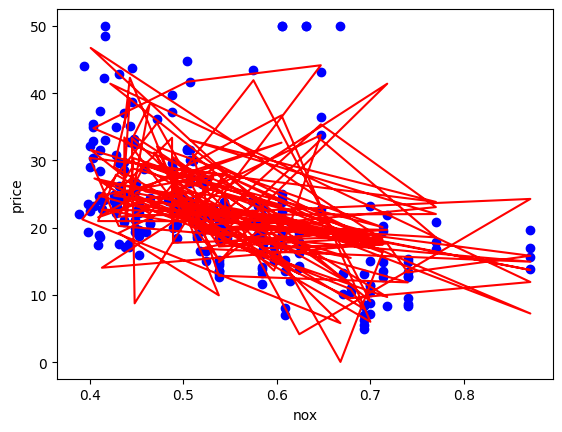

In [ ]:
xpp = x_train.iloc[:,4]

xt = x_test.iloc[:,4]

plt.scatter(xpp, y_train, c='blue')
plt.plot(xt, y_predict, color='r')
plt.xlabel('nox' )
plt.ylabel('price')
plt.show()